# Лабораторная работа № 5

# Морозова Маргарита, РИ-481223

## Вариант 12

In [122]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import statsmodels.api as sm

### Cоздаем собственные АРПСС ряды первого и второго порядков.

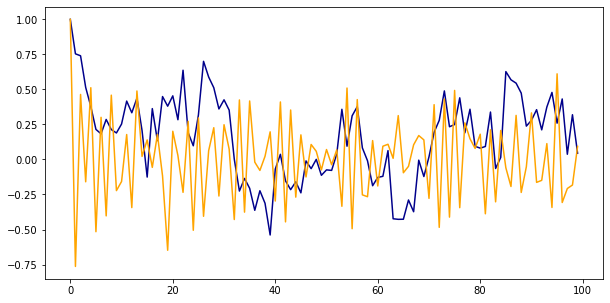

In [77]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
 z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
 z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'darkblue')
plt.plot(z2, 'orange')
plt.show()

Строим для этих рядов функции автокорреляции с помощью функции plot_acf:


<Figure size 720x360 with 0 Axes>

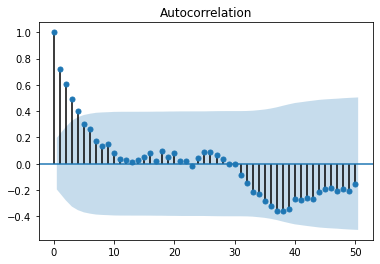

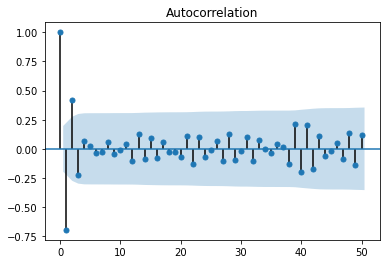

In [78]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

Оценим весовые параметры этих процессов. Удостоверимся, что для модели АР(1) коэффициенты автокорреляции изменяются по степенному закону.

In [79]:
l = np.arange(0, 51, 1)
tmp_1 = np.correlate(z1, z1, mode = 'full')
rt_1=tmp_1[(np.size(tmp_1))//2:] /np.max(tmp_1)
tmp_2 = np.correlate(z2, z2, mode = 'full')
rt_2=tmp_2[(np.size(tmp_2))//2:] /np.max(tmp_2)

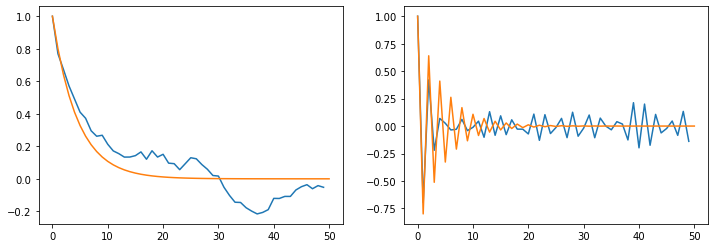

In [80]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(rt_1[0:50])
plt.plot(l, 0.8**l)

plt.subplot(122)
plt.plot(rt_2[0:50])
plt.plot(l, (-0.8)**l)

### Строим два СС(1) процесса среднего-скользящего первого порядка.

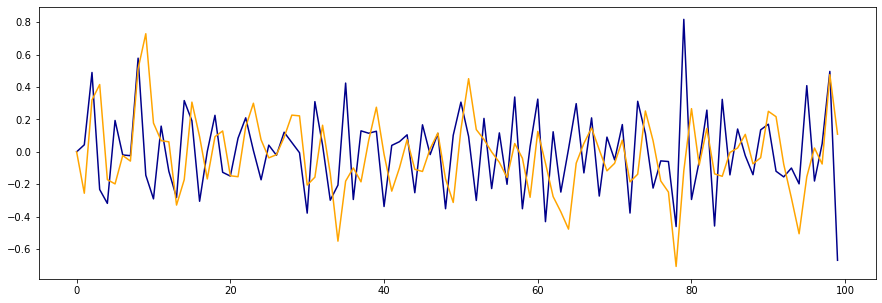

In [70]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (15, 5))
plt.plot(z3, 'darkblue')
plt.plot(z4, 'orange')
plt.show()

<Figure size 720x360 with 0 Axes>

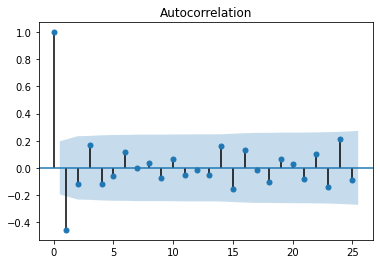

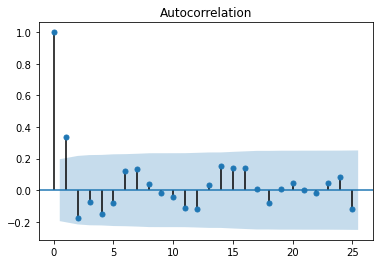

In [71]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

Оценим весовые параметры этих процессов.

In [72]:
tmp_3 = np.correlate(z3, z3, mode = 'full')
rt_3=tmp_3[(np.size(tmp_3))//2:] /np.max(tmp_3)
tmp_4 = np.correlate(z4, z4, mode = 'full')
rt_4=tmp_4[(np.size(tmp_4))//2:] /np.max(tmp_4)

In [73]:
def eq (x):# оценка весового параметра
    root1 = (-1 / x - np.sqrt((1 / x)**2 - 4)) / 2
    if (abs(root1) < 1): 
        Q = root1
    else:
        root2 = (-1 / x + np.sqrt((1 / x)**2 - 4)) / 2
        Q = root2
    return Q

In [74]:
Q_z3 = eq(rt_3[1])
print('Оценка весового параметра z3:', Q_z3)
Q_z4 = eq(rt_4[1])
print('Оценка весового параметра z4:', Q_z4)

Оценка весового параметра z3: 0.6520826405273435
Оценка весового параметра z4: -0.38893151602679876


Удостоверимся, что для модели СС(1) коэффициенты автокорреляции изменяются по закону из п.11.

Коэффициенты автокорреляции для z3 и z4 при k=1 

In [75]:
print('z3 (реальное значение)', rt_3[1])
print('z3 (расчитанное по формуле)',-Q_z3/(1+Q_z3**2))
print('z4 (реальное значение)', rt_4[1])
print('z4 (расчитанное по формуле)',-Q_z4/(1+Q_z4**2))

z3 (реальное значение) -0.45753385862934726
z3 (расчитанное по формуле) -0.4575338586293473
z4 (реальное значение) 0.3378289062267817
z4 (расчитанное по формуле) 0.3378289062267817


Реальные и расчетные значения коэффициентов практически совпадают.

Коэффициенты автокорреляции для z3 и z4 при k>=2

In [76]:
print('Для модели z3:\n', rt_3[2:25])
print('Для модели z4:\n', rt_4[2:25])

Для модели z3:
 [-0.11710518  0.16930623 -0.11714826 -0.05952992  0.11498843 -0.00254158
  0.03929926 -0.07462757  0.06556096 -0.0506275  -0.01829187 -0.05504854
  0.16479761 -0.15489008  0.13223718 -0.01435362 -0.10337806  0.06345666
  0.02890904 -0.08527524  0.10206307 -0.13901658  0.21041837]
Для модели z4:
 [-0.17007093 -0.06932757 -0.14045957 -0.0751939   0.12495689  0.14055657
  0.04109237 -0.00990714 -0.03236396 -0.10388774 -0.11154425  0.04519131
  0.15878846  0.14901065  0.14853504  0.01438822 -0.07415611  0.01927039
  0.05769615  0.00988274 -0.01122064  0.0546793   0.08806278]


### Строим временной ряд процесса АРСС(1, 1)

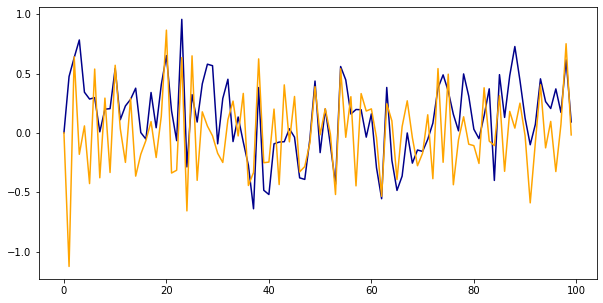

In [81]:
z5 = np.zeros(100) 
z6 = np.zeros(100) 
z1[0] = 1 
z2[0] = 1 
ar = 0.2 * np.random.randn(100) 
for i in range(1,100): 
    z5[i] = 0.8 * z1[i - 1] + ar[i] - 0.8 * ar[i - 1]
    z6[i] = -0.8 * z2[i - 1] + ar[i] - 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5)) 
plt.plot(z5, 'darkblue') 
plt.plot(z6, 'orange') 
plt.show() 

<Figure size 720x360 with 0 Axes>

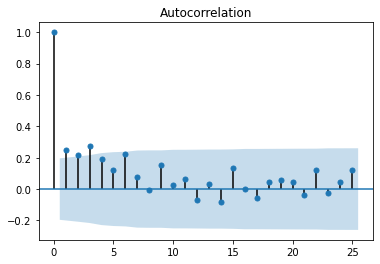

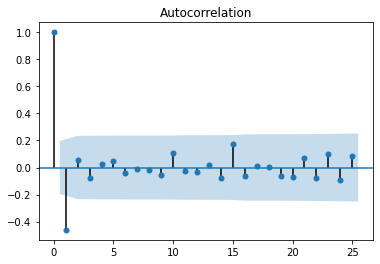

In [82]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

Используем более высокоуровневый способ генерации рядов АРПСС. 

In [83]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС 
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

In [84]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 
0.45] #значения исходного ряда

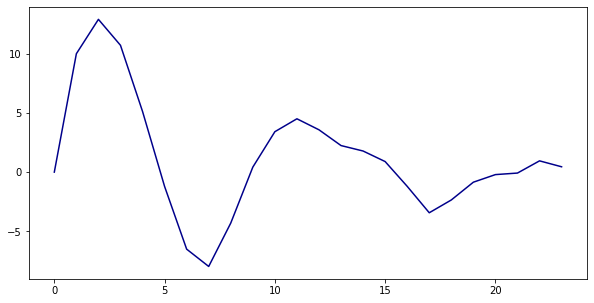

In [85]:
plt.figure(figsize = (10, 5)) 
plt.plot(TEST, 'darkblue') 
plt.show() 

<Figure size 720x360 with 0 Axes>

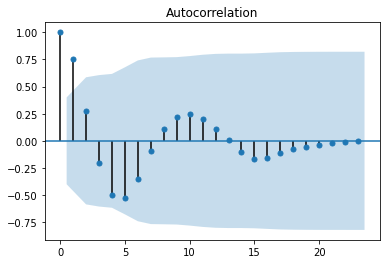

In [89]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=23)
plt.show()

Создадим три пробные модели АРПСС для проверки ряда.

In [90]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472:

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Wed, 22 Jun 2022   AIC                            128.850
Time:                        16:12:22   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

По критериям BIC и AIC выбираем модель АР(2).

Другой метод выбора модели.

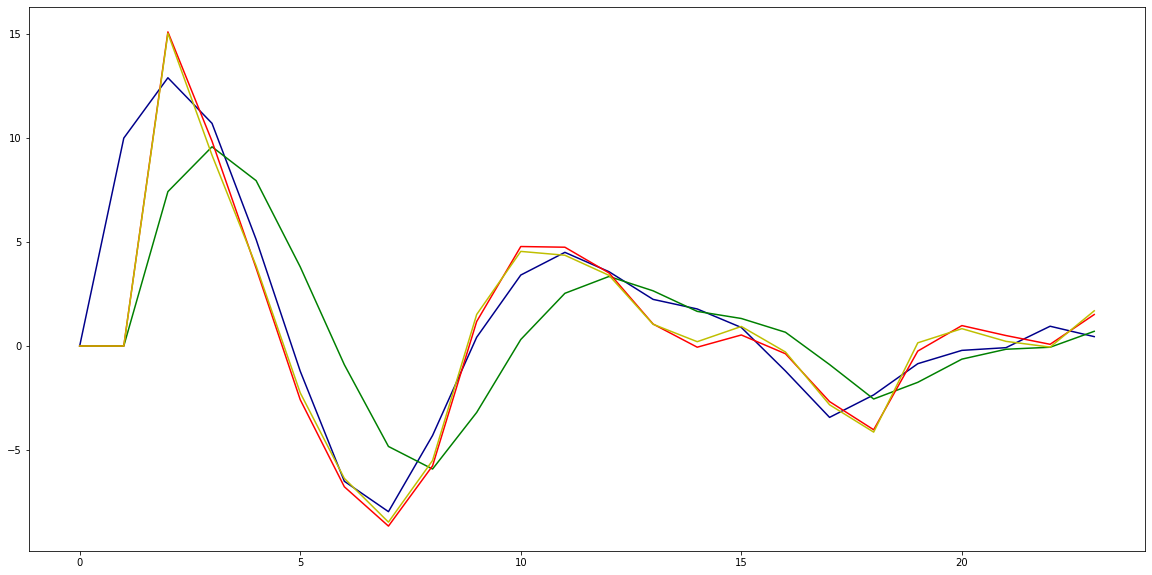

In [92]:
plt.figure(figsize = (20, 10))
plt.plot(TEST, color = 'darkblue')
plt.plot(model_fit1.fittedvalues, color = 'g') 
plt.plot(model_fit2.fittedvalues, color = 'r') 
plt.plot(model_fit3.fittedvalues, color = 'y') 

В этом метоже, АР(2) также является наиболее оптимальной моделью ВР.

In [93]:
# Автокорреляционная функция ВР
tmp = np.correlate(TEST, TEST, mode = 'full')
rt=tmp[(np.size(tmp))//2:] /np.max(tmp)

In [95]:
print('Весовой коэффициент для АР(1):', rt[1])
fi_1 = rt[1] * (1 - rt[2]) / (1 - (rt[1]**2))
fi_2 = (rt[2] - (rt[1])**2) / (1 - (rt[1]**2))
print('Весовой коэффициент для АР(2):', fi_1, fi_2)

Весовой коэффициент для АР(1): 0.7704732831172564
Весовой коэффициент для АР(2): 1.334624358524514 -0.732213676669955


### Загружаем из mat-файла временной ряд Z

In [96]:
file = h5py.File(r'C:\Users\Морозова Маргарита\Downloads\12.mat') 
data = file.get('z12') 
Z = np.array(data)

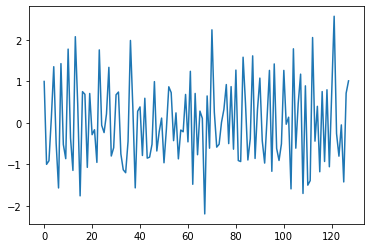

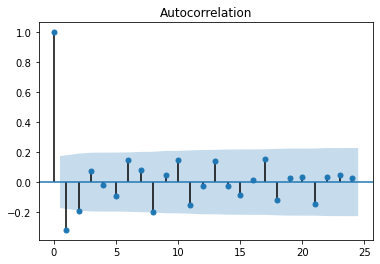

In [97]:
plt.plot(Z)
tmp=plot_acf(Z, lags=24)

Оценка порядка АРСС модели с помощью класса ARIMA. 

In [100]:
arima1 = ARIMA(Z, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов

arima0_1 = ARIMA(Z, order = (0, 0, 1))
model_fit0_1 = arima0_1.fit(disp = False, trend='nc')
print(model_fit0_1.summary())

arima2 = ARIMA(Z, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima0_2 = ARIMA(Z, order = (0, 0, 2))
model_fit0_2 = arima0_2.fit(disp = False, trend='nc')
print(model_fit0_2.summary())

arima3 = ARIMA(Z, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                -174.377
Method:                       css-mle   S.D. of innovations              0.945
Date:                Wed, 22 Jun 2022   AIC                            352.754
Time:                        16:32:51   BIC                            358.458
Sample:                             0   HQIC                           355.071
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.3218      0.084     -3.833      0.000      -0.486      -0.157
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472:

Выбираем по параметру BIC. Оптимальная модель - arima0_1 с параметрами (0, 0, 1)

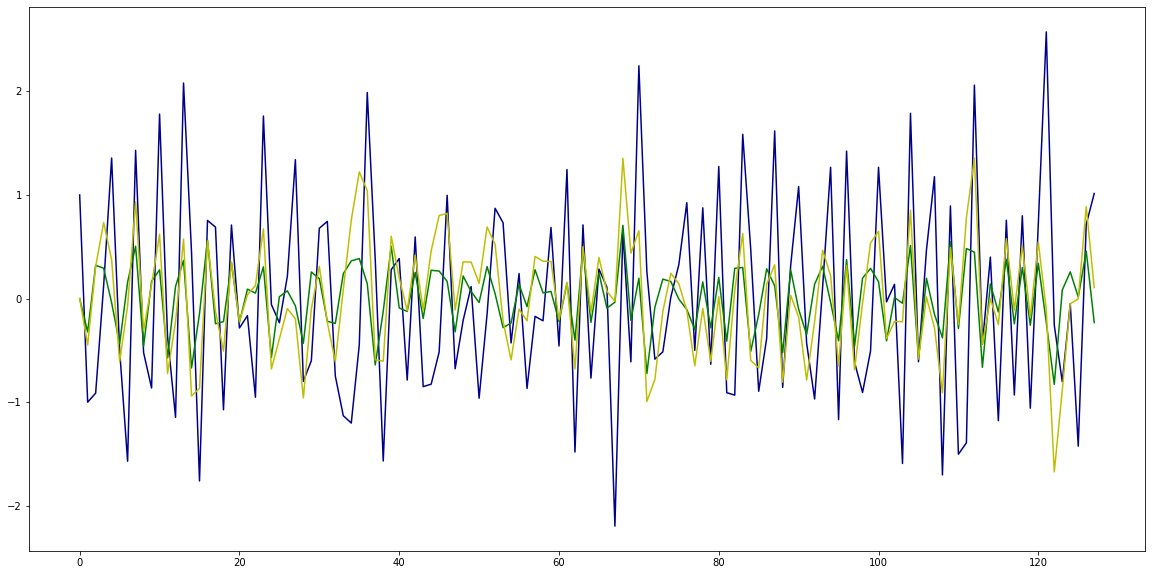

In [111]:
plt.figure(figsize = (20, 10))
plt.plot(Z, color = 'darkblue')
plt.plot(model_fit1.fittedvalues, color = 'g') 
plt.plot(model_fit0_1.fittedvalues, color = 'y') 


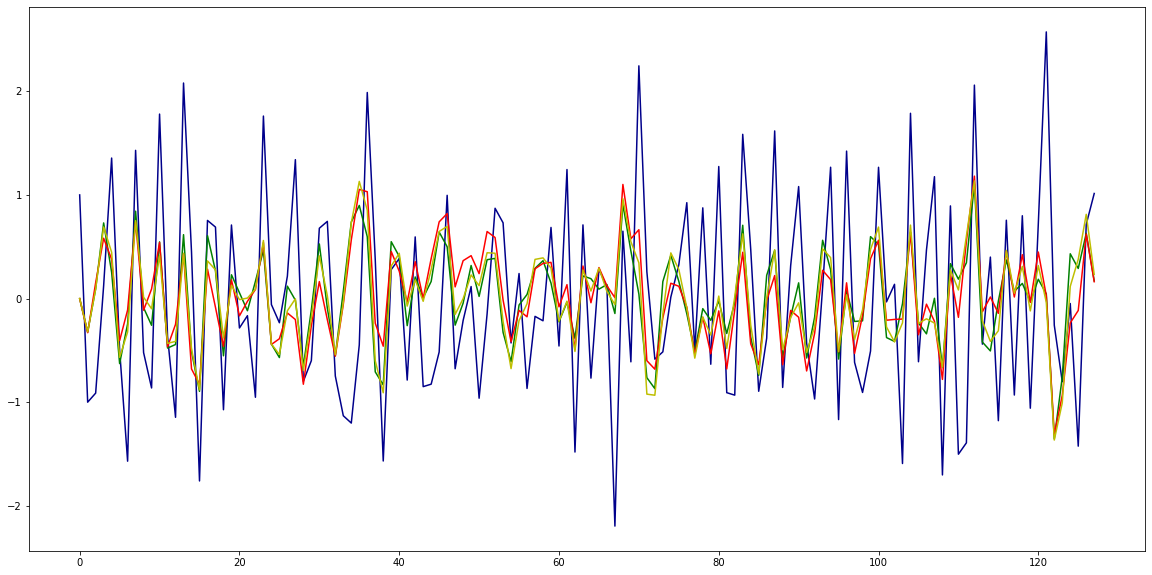

In [113]:
plt.figure(figsize = (20, 10))
plt.plot(Z, color = 'darkblue')
plt.plot(model_fit2.fittedvalues, color = 'g') 
plt.plot(model_fit0_2.fittedvalues, color = 'r') 
plt.plot(model_fit3.fittedvalues, color = 'y') 

Используя данный метод, подучаем ,что оптимальная модель, опять же - arima0_1.

Прогнозированию на основе АРПСС моделей.

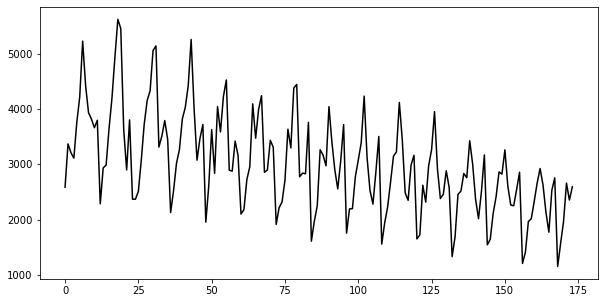

In [114]:
file = h5py.File(r'C:\Users\Морозова Маргарита\Downloads\Fort.mat') 
data = file.get('Fort') 
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

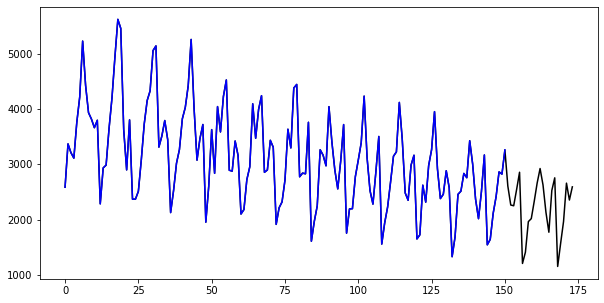

In [115]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

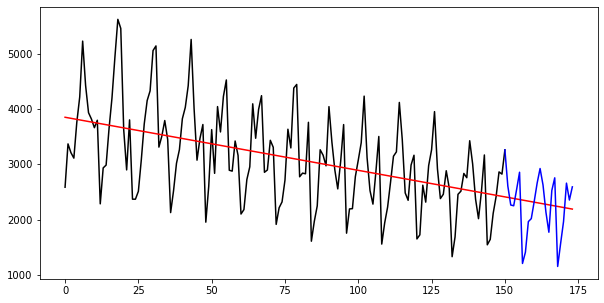

In [117]:
t0=np.arange(0, len(Fort), 1)    # Строим линейный тренд
t0=t0.reshape(-1,1)
def func(t, b0, b1):
    return b0 + b1 * t
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
ZZ1 = t0*popt[1]+popt[0]
plt.plot(t0, ZZ1, 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

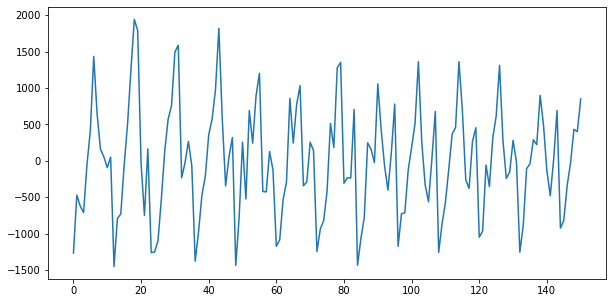

In [119]:
ZZ = Z - ZZ1[:-23] # Тренд-стационарная форма
plt.figure(figsize = (10, 5))
plt.plot(t0[:-23], ZZ)

In [149]:
import itertools    
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [150]:
for param in pdq:
            mod = sm.tsa.statespace.SARIMAX(ZZ, order = param, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{} - AIC:{}'.format(param, results.aic))   

ARIMA(0, 0, 0) - AIC:2412.3769279604358
ARIMA(0, 0, 1) - AIC:2356.315713474786
ARIMA(0, 0, 2) - AIC:2341.941187057293
ARIMA(0, 1, 0) - AIC:2400.968518239685
ARIMA(0, 1, 1) - AIC:2383.4661269244853
ARIMA(0, 1, 2) - AIC:2332.8588531963233
ARIMA(0, 2, 0) - AIC:2505.4801896423246
ARIMA(0, 2, 1) - AIC:2381.1099801979426
ARIMA(0, 2, 2) - AIC:2366.9352478501046
ARIMA(1, 0, 0) - AIC:2373.863821863535
ARIMA(1, 0, 1) - AIC:2356.6144761447167
ARIMA(1, 0, 2) - AIC:2335.3598397349197
ARIMA(1, 1, 0) - AIC:2400.644692641152
ARIMA(1, 1, 1) - AIC:2350.3351920233904
ARIMA(1, 1, 2) - AIC:2333.140092049035
ARIMA(1, 2, 0) - AIC:2473.5619495437677
ARIMA(1, 2, 1) - AIC:2376.2673999865283
ARIMA(1, 2, 2) - AIC:2351.833040544785
ARIMA(2, 0, 0) - AIC:2356.5026349421546
ARIMA(2, 0, 1) - AIC:2330.511313611156
ARIMA(2, 0, 2) - AIC:2309.282640209603
ARIMA(2, 1, 0) - AIC:2378.255339792199
ARIMA(2, 1, 1) - AIC:2347.7773340001067
ARIMA(2, 1, 2) - AIC:2332.762269322159
ARIMA(2, 2, 0) - AIC:2426.093632187559
ARIMA(2, 2, 

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Оптимальная модель - ARIMA(2, 0, 2) - AIC:2309.282640209603

In [146]:
arimaz = ARIMA(ZZ, order = (2, 0, 2)) 
model_fit = arimaz.fit(disp = False) # подгоняем под ВР 
print(model_fit.summary())

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(2, 2)   Log Likelihood               -1156.842
Method:                       css-mle   S.D. of innovations            505.553
Date:                Wed, 22 Jun 2022   AIC                           2325.684
Time:                        17:11:16   BIC                           2343.788
Sample:                             0   HQIC                          2333.039
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8491     34.249      0.112      0.911     -63.278      70.976
ar.L1.y        1.7305      0.005    337.431      0.000       1.720       1.741
ar.L2.y       -0.9964      0.004   -226.423      0.0

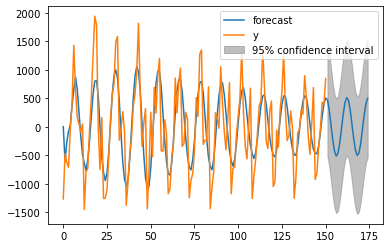

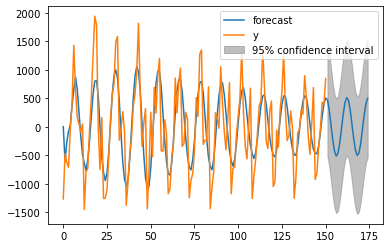

In [154]:
model_fit.plot_predict(0, len(Fort)) 

<Figure size 720x360 with 0 Axes>

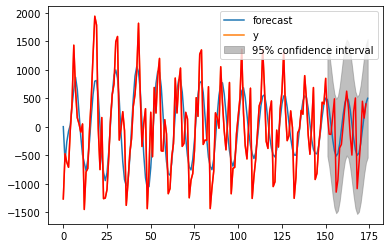

In [155]:
plt.figure(figsize = (10, 5))
model_fit.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort-ZZ1, 'r') # исходный ВР минус тренд
plt.show()

In [161]:
predict = model_fit.predict(len(Z), len(Fort)) #сами прогнозные значения

Оценка точности прогноза:

In [162]:
import math
def estimate(Z1, F):
    
    midEx = np.zeros(len(Z1))
    for i in range(len(Z1)):
        midEx[i] = abs((Z1[i] - F[i]))
    delta = np.sum(midEx)/len(Z1)
    print('Средняя ошибка прогноза:', delta)
    
    midEx = np.zeros(len(Z1))
    for i in range(len(Z1)):
        midEx[i] = (Z1[i] - F[i])**2
    sigma = math.sqrt(np.sum(midEx)/len(Z1))
    print('СКВО прогноза:', sigma)
    
    midEx = np.zeros(len(Z1))
    for i in range(1, len(Z1)):
        midEx[i] = abs((Z1[i] - F[i]))/(Z1[i])
    epsilon = np.sum(midEx)*100/len(Z1)
    print('Средняя ошибка аппроксимации:', epsilon,'%')

In [163]:
newFort = Fort-ZZ1
estimate(predict, newFort[-24:])

Средняя ошибка прогноза: 383.6711017297777
СКВО прогноза: 469.81556664400586
Средняя ошибка аппроксимации: -50.57537340456569 %


АРПСС модель для прогнозирования данного ряда, но без исходного вычитания из него линейного тренда:

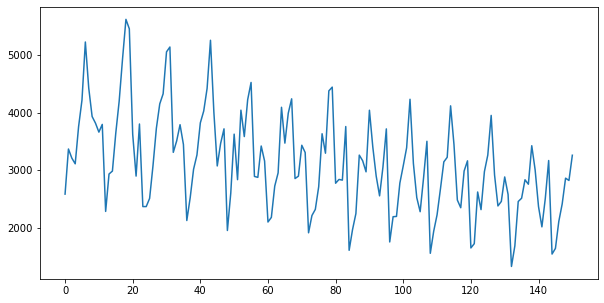

In [164]:
plt.figure(figsize = (10, 5))
plt.plot(t0[:-23], Z)

In [165]:
arimaz = ARIMA(Z, order = (2, 0, 2)) 
model_fit = arimaz.fit(disp = False) 
print(model_fit.summary())

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:701: Ru

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(2, 2)   Log Likelihood               -1214.332
Method:                       css-mle   S.D. of innovations            745.136
Date:                Wed, 22 Jun 2022   AIC                           2440.664
Time:                        17:22:45   BIC                           2458.767
Sample:                             0   HQIC                          2448.018
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.8619        nan        nan        nan         nan         nan
ar.L1.y        1.9768        nan        nan        nan         nan         nan
ar.L2.y       -0.9769        nan        nan        n

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


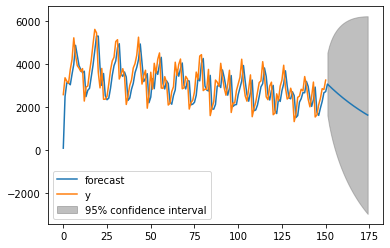

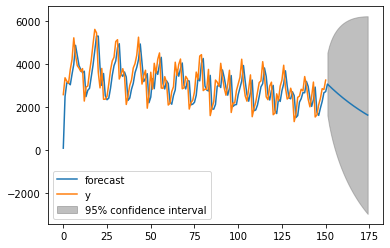

In [168]:
model_fit.plot_predict(0, len(Fort))

<Figure size 720x360 with 0 Axes>

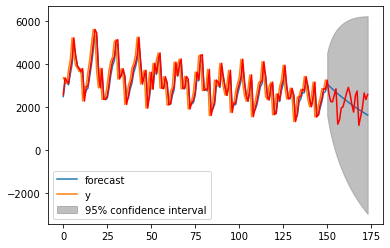

In [169]:
plt.figure(figsize = (10, 5)) 
model_fit.plot_predict(1, len(Fort)) 
plt.plot(t0, Fort, 'r')
plt.show() 

In [170]:
predict = model_fit.predict(len(Z), len(Fort)) 

In [171]:
newFort = Fort
estimate(predict, newFort[-24:])

Средняя ошибка прогноза: 526.0075653411944
СКВО прогноза: 629.7909812329226
Средняя ошибка аппроксимации: 23.938321258469106 %


Видим, что точность прогноза снизилать.